**House Price Prediction**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/data.csv')
df_train

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

**we use df.info() to know the data type of each column. we also knew that the data doesn't have any null values.**

In [ ]:
#to view the mean and standard deviation of columns.
#to view if the data has any outliers.
df_train.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
#creating a function to calculate and return the percentage of outliers in each column
def calculate_outlier_percentage(df):
    outlier_percentages = {}

    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

            outlier_percentage = (len(outliers) / len(df)) * 100
            outlier_percentages[col] = outlier_percentage

    return outlier_percentages

outlier_percentages = calculate_outlier_percentage(df_train)

for col, percentage in outlier_percentages.items():
    print(f"Column '{col}' has {percentage:.2f}% outliers.")

Column 'price' has 5.22% outliers.
Column 'bedrooms' has 2.57% outliers.
Column 'bathrooms' has 3.07% outliers.
Column 'sqft_living' has 2.80% outliers.
Column 'sqft_lot' has 11.76% outliers.
Column 'floors' has 0.00% outliers.
Column 'waterfront' has 0.72% outliers.
Column 'view' has 10.00% outliers.
Column 'condition' has 0.13% outliers.
Column 'sqft_above' has 2.52% outliers.
Column 'sqft_basement' has 1.78% outliers.
Column 'yr_built' has 0.00% outliers.
Column 'yr_renovated' has 0.00% outliers.


**As the outliers are small percetnage of the data so, we will keep them and deal with them using standard scaler before applying models**

In [ ]:
#extracting only numeric columns to use them in analysis
numeric_cols = df_train.select_dtypes(include='number').columns
numeric_df = df_train[numeric_cols]

In [ ]:
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

In [ ]:
# Display the correlation matrix between numerical features and the target variable 'Price'.
correlation_with_price=correlation_matrix['price'].sort_values(ascending=False)
correlation_with_price

,price
price,1.000000
sqft_living,0.430410
sqft_above,0.367570
bathrooms,0.327110
view,0.228504
sqft_basement,0.210427
bedrooms,0.200336
floors,0.151461
waterfront,0.135648
sqft_lot,0.050451


In [ ]:
from scipy.stats import shapiro, ttest_ind

In [ ]:
# checking if the 'Price' follows Normal distribution

# Perform Shapiro-Wilk test on the 'Price' column
statistic, p_value = shapiro(df_train['price'])

# Define significance level (alpha)
alpha = 0.05

# Check the test result
if p_value > alpha:
    print("SalePrice follows a normal distribution (fail to reject H0)")
else:
    print("SalePrice does not follow a normal distribution (reject H0)")

SalePrice does not follow a normal distribution (reject H0)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

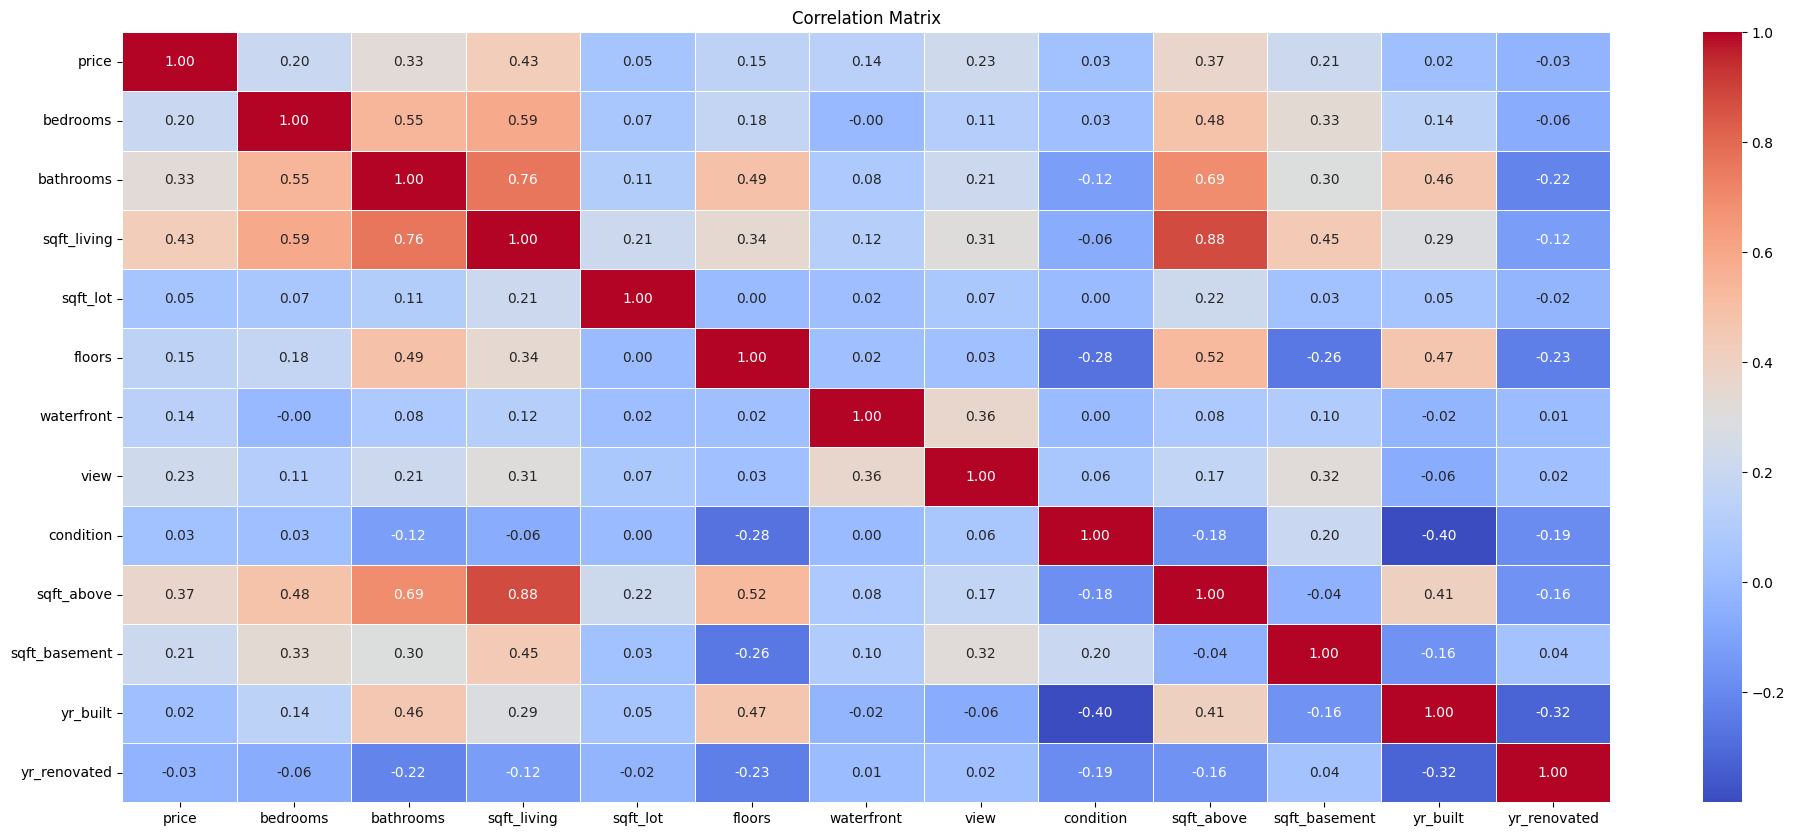

In [ ]:
plt.figure(figsize=(24, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

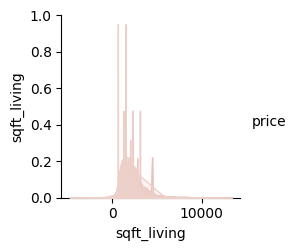

In [ ]:
#creating a pairplot with highly correlated variables with price
highly_correlated_with_target = correlation_with_price[(correlation_with_price > 0.4) & (correlation_with_price != 1)]
highly_correlated_with_target

# Extract the column names of highly correlated variables
highly_correlated_vars = highly_correlated_with_target.index.tolist()

# Create a subset DataFrame with highly correlated variables and the target column
subset_df = df_train[highly_correlated_vars+['price']]

# Create pairplot using seaborn
sns.pairplot(subset_df, hue='price')
plt.show()

In [ ]:
X = numeric_df
y = df_train['price']

In [ ]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Mean Squared Error: 0.00
R-squared Score: 1.00


**Random forest regression model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

y_pred = rf_regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 608069778649.61
R-squared Score: 0.40


**Decison Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train_scaled, y_train)

y_pred = dt_regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 660840603419.49
R-squared Score: 0.35


**Gradient boosting regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_regressor.fit(X_train_scaled, y_train)

y_pred = gb_regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 559457212220.87
R-squared Score: 0.45
